### Importing Libraries

In [1]:
# import yfinance as yf
# import pandas_ta as ta
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

import numpy as np
import matplotlib.pyplot as plt




### Making the Dataset

In [2]:
folder_path = 'data/stock_technical_data/'

Bank Nifty Stock Symbols

In [97]:
bank_nifty_stock_symbols = [
    "HDFCBANK.NS",
    "AXISBANK.NS",
    "ICICIBANK.NS",
    "HDFCBANK.NS",
    "KOTAKBANK.NS",
    "SBIN.NS",
    "INDUSINDBK.NS",
    "BANDHANBNK.NS",
    "FEDERALBNK.NS",
    "PNB.NS",
    "IDFCFIRSTB.NS",
    "BANKBARODA.NS",
    "AUBANK.NS"
]

In [98]:
start_date = "2017-01-01"
end_date = "2022-12-31"

In [99]:
def make_dataset(stock_symbol, start_date, end_date):

    stock_df = yf.download(stock_symbol, start=start_date, end=end_date)

    # Simple Moving Average (SMA)
    stock_df["SMA_9"] = ta.sma(stock_df["Close"], length = 9)
    stock_df["SMA_21"] = ta.sma(stock_df["Close"], length = 21)

    # Exponential Moving Average (EMA)
    stock_df["EMA_9"] = ta.ema(stock_df["Close"], length = 9)
    stock_df["EMA_21"] = ta.ema(stock_df["Close"], length = 21)

    # Double Exponential Moving Average (DEMA)
    stock_df["DEMA_9"] = ta.dema(stock_df["Close"], length = 9)
    stock_df["DEMA_21"] = ta.dema(stock_df["Close"], length = 21)

    # Moving Average Convergence Divergence (MACD)
    stock_df["MACD_Line"] = ta.macd(stock_df["Close"])["MACD_12_26_9"]
    stock_df["MACD_Signal_Line"] = ta.macd(stock_df["Close"])["MACDs_12_26_9"]

    # Relative Strength Index (RSI)
    stock_df["RSI_14"] = ta.rsi(stock_df["Close"], length = 14) 

    # Stochastic Oscillator
    stoch = ta.stoch(stock_df['High'], stock_df['Low'], stock_df['Close'], k=14, d=3)
    stock_df["Stoch_Oscillator_K"] = stoch["STOCHk_14_3_3"]
    stock_df["Stoch_Oscillator_D"] = stoch["STOCHd_14_3_3"]

    # Bollinger Bands / Standard Deviation
    bollinger_bands = ta.bbands(stock_df["Close"], length = 20, std = 2)
    stock_df['BB_middle'] = bollinger_bands['BBM_20_2.0']
    stock_df['BB_upper'] = bollinger_bands['BBU_20_2.0']
    stock_df['BB_lower'] = bollinger_bands['BBL_20_2.0']

    # Average Directional Index (ADX)
    adx = ta.adx(stock_df['High'], stock_df['Low'], stock_df['Close'], length = 14)
    stock_df['ADX'] = adx['ADX_14']
    stock_df['ADX+DI'] = adx['DMP_14'] 
    stock_df['ADX-DI'] = adx['DMN_14']

    # Chaikin Money Flow (CMF)
    stock_df['CMF'] = ta.cmf(stock_df['High'], stock_df['Low'], stock_df['Close'], stock_df['Volume'], length = 21)

    # On Balance Volume (OBV)
    stock_df['OBV'] = ta.obv(stock_df['Close'], stock_df['Volume'])

    # Commodity Channel Index (CCI)
    stock_df['CCI'] = ta.cci(stock_df['High'], stock_df['Low'], stock_df['Close'], length = 20)

    # Williams %R
    stock_df['Williams_%R'] = ta.willr(stock_df['High'], stock_df['Low'], stock_df['Close'], length = 14)

    # Average True Range (ATR)
    stock_df['ATR'] = ta.atr(stock_df['High'], stock_df['Low'], stock_df['Close'], length = 14)

    return stock_df

In [100]:
def fill_moving_averages(stock_df):
    moving_avg_columns = ['SMA_9', 'SMA_21', 'EMA_9', 'EMA_21', 'DEMA_9', 'DEMA_21']
    
    for col in moving_avg_columns:
        stock_df[col] = stock_df[col].fillna(stock_df[col].expanding().mean())
    
    return stock_df

In [101]:

for stock_symbol in bank_nifty_stock_symbols:
    stock_df = make_dataset(stock_symbol, start_date, end_date)
    print("Shape of the dataset: ", stock_df.shape)
    stock_df.to_csv(f"{folder_path}{stock_symbol}.csv")
    print(f"Data for {stock_symbol} stored in {folder_path}{stock_symbol}.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Shape of the dataset:  (1484, 28)
Data for HDFCBANK.NS stored in data/stock_technical_data/HDFCBANK.NS.csv
Shape of the dataset:  (1484, 28)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for AXISBANK.NS stored in data/stock_technical_data/AXISBANK.NS.csv
Shape of the dataset:  (1484, 28)
Data for ICICIBANK.NS stored in data/stock_technical_data/ICICIBANK.NS.csv



[*********************100%***********************]  1 of 1 completed


Shape of the dataset:  (1484, 28)
Data for HDFCBANK.NS stored in data/stock_technical_data/HDFCBANK.NS.csv
Shape of the dataset:  (1484, 28)


[*********************100%***********************]  1 of 1 completed


Data for KOTAKBANK.NS stored in data/stock_technical_data/KOTAKBANK.NS.csv
Shape of the dataset:  (1484, 28)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for SBIN.NS stored in data/stock_technical_data/SBIN.NS.csv
Shape of the dataset:  (1484, 28)
Data for INDUSINDBK.NS stored in data/stock_technical_data/INDUSINDBK.NS.csv



[*********************100%***********************]  1 of 1 completed


Shape of the dataset:  (1178, 28)
Data for BANDHANBNK.NS stored in data/stock_technical_data/BANDHANBNK.NS.csv
Shape of the dataset:  (1484, 28)


[*********************100%***********************]  1 of 1 completed


Data for FEDERALBNK.NS stored in data/stock_technical_data/FEDERALBNK.NS.csv
Shape of the dataset:  (1484, 28)
Data for PNB.NS stored in data/stock_technical_data/PNB.NS.csv


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Shape of the dataset:  (1484, 28)
Data for IDFCFIRSTB.NS stored in data/stock_technical_data/IDFCFIRSTB.NS.csv



[*********************100%***********************]  1 of 1 completed

Shape of the dataset:  (1484, 28)
Data for BANKBARODA.NS stored in data/stock_technical_data/BANKBARODA.NS.csv
Shape of the dataset:  (1355, 28)
Data for AUBANK.NS stored in data/stock_technical_data/AUBANK.NS.csv


In [102]:
aubank_df = make_dataset("AUBANK.NS", start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [103]:
aubank_df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_21,EMA_9,EMA_21,...,BB_upper,BB_lower,ADX,ADX+DI,ADX-DI,CMF,OBV,CCI,Williams_%R,ATR
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-11,268.500000,287.325012,266.200012,283.625000,282.023376,28572624,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28572624.0,NaN,NaN,NaN
2017-07-12,288.225006,321.350006,287.500000,314.774994,312.997467,35549156,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,64121780.0,NaN,NaN,NaN
2017-07-13,326.000000,349.475006,315.049988,345.575012,343.623535,43750394,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,107872174.0,NaN,NaN,NaN
2017-07-14,348.899994,362.750000,280.549988,299.399994,297.709290,67296768,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40575406.0,NaN,NaN,NaN
2017-07-17,295.000000,306.850006,281.174988,298.049988,296.366882,23021580,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17553826.0,NaN,NaN,NaN


In [104]:
aubank_df.describe()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_21,EMA_9,EMA_21,...,BB_upper,BB_lower,ADX,ADX+DI,ADX-DI,CMF,OBV,CCI,Williams_%R,ATR
count,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1.355000e+03,1347.000000,1335.000000,1347.000000,1335.000000,...,1336.000000,1336.000000,1328.000000,1341.000000,1341.000000,1335.000000,1.355000e+03,1336.000000,1342.000000,1341.000000
mean,430.413322,438.241274,421.833469,430.017878,428.271010,1.769028e+06,429.705172,429.238452,429.712380,429.320999,...,466.002984,392.547716,27.979974,21.226573,20.354704,0.019021,6.259401e+07,21.357652,-44.833658,17.033593
std,140.180256,142.510278,137.538472,139.875776,139.556089,3.218745e+06,138.760488,136.829869,138.237417,135.665593,...,150.297221,129.355492,10.737608,7.660815,8.011514,0.167709,7.211204e+07,113.426342,27.009421,6.897520
min,190.000000,196.500000,183.000000,190.074997,189.362411,2.461000e+04,198.427780,206.785715,200.185417,214.670555,...,228.058797,119.469471,10.782116,3.937697,2.616118,-0.487426,-1.989554e+07,-351.556824,-100.000000,7.803421
25%,316.649994,322.450012,309.512512,317.125000,315.682220,4.954650e+05,317.986113,317.529763,317.250364,317.277248,...,341.312810,287.566688,19.829498,15.702769,14.500794,-0.104512,1.101430e+06,-65.991065,-67.139695,10.908416
50%,360.000000,366.500000,352.000000,359.524994,357.853394,1.113566e+06,356.719449,352.058331,356.543037,351.045779,...,392.159109,334.549353,26.014522,20.602979,19.290568,0.020570,3.251802e+07,30.696951,-41.422026,15.598055
75%,580.987488,591.237488,570.012512,580.774994,578.796936,2.074530e+06,578.556942,579.760122,580.215760,582.249277,...,631.904671,531.197595,34.809767,26.146586,25.225020,0.121374,1.292037e+08,104.572593,-21.760324,22.120444
max,717.000000,732.974976,711.500000,717.525024,714.835083,6.729677e+07,700.980550,689.083330,696.143318,679.502438,...,745.690111,658.819359,62.939752,54.300496,49.483798,0.532465,2.186475e+08,403.456521,0.000000,44.276451


In [105]:
aubank_df.isnull().sum()

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
SMA_9                  8
SMA_21                20
EMA_9                  8
EMA_21                20
DEMA_9                 8
DEMA_21               20
MACD_Line             25
MACD_Signal_Line      33
RSI_14                14
Stoch_Oscillator_K    15
Stoch_Oscillator_D    17
BB_middle             19
BB_upper              19
BB_lower              19
ADX                   27
ADX+DI                14
ADX-DI                14
CMF                   20
OBV                    0
CCI                   19
Williams_%R           13
ATR                   14
dtype: int64

### Cleaning Dataset


In [106]:
aubank_df = pd.read_csv(f"{folder_path}AUBANK.NS.csv")

In [107]:
def find_missing_indices(stock_df):
    
    missing_indices = {}

    for column in stock_df.columns:
        missing = stock_df[stock_df[column].isnull()].index.tolist()
        if missing:  
            missing_indices[column] = missing

    return missing_indices


In [108]:
missing_values = find_missing_indices(aubank_df)

for indicator, indices in missing_values.items():
    print(f"Missing values for {indicator}: {indices}")

Missing values for SMA_9: [0, 1, 2, 3, 4, 5, 6, 7]
Missing values for SMA_21: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Missing values for EMA_9: [0, 1, 2, 3, 4, 5, 6, 7]
Missing values for EMA_21: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Missing values for DEMA_9: [0, 1, 2, 3, 4, 5, 6, 7]
Missing values for DEMA_21: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Missing values for MACD_Line: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Missing values for MACD_Signal_Line: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
Missing values for RSI_14: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Missing values for Stoch_Oscillator_K: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Missing values for Stoch_Oscillator_D: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Missing 

In [109]:
def clean_datasets(folder_path):

    for stock_symbol in bank_nifty_stock_symbols:
        stock_df = pd.read_csv(f"{folder_path}{stock_symbol}.csv")
        if 'PSAR' in stock_df.columns:
            stock_df.drop('PSAR', axis=1, inplace=True)

        stock_df_clean = stock_df.dropna()

        print("Number of rows dropped: ", stock_df.shape[0] - stock_df_clean.shape[0])

        stock_df_clean.to_csv(f"{folder_path}{stock_symbol}.csv", index=False)
        print(f"Data for {stock_symbol} cleaned and stored in {folder_path}{stock_symbol}.csv")

In [110]:
clean_datasets(folder_path)

Number of rows dropped:  33
Data for HDFCBANK.NS cleaned and stored in data/stock_technical_data/HDFCBANK.NS.csv
Number of rows dropped:  33
Data for AXISBANK.NS cleaned and stored in data/stock_technical_data/AXISBANK.NS.csv
Number of rows dropped:  33
Data for ICICIBANK.NS cleaned and stored in data/stock_technical_data/ICICIBANK.NS.csv
Number of rows dropped:  0
Data for HDFCBANK.NS cleaned and stored in data/stock_technical_data/HDFCBANK.NS.csv
Number of rows dropped:  33
Data for KOTAKBANK.NS cleaned and stored in data/stock_technical_data/KOTAKBANK.NS.csv
Number of rows dropped:  33
Data for SBIN.NS cleaned and stored in data/stock_technical_data/SBIN.NS.csv
Number of rows dropped:  33
Data for INDUSINDBK.NS cleaned and stored in data/stock_technical_data/INDUSINDBK.NS.csv
Number of rows dropped:  33
Data for BANDHANBNK.NS cleaned and stored in data/stock_technical_data/BANDHANBNK.NS.csv
Number of rows dropped:  33
Data for FEDERALBNK.NS cleaned and stored in data/stock_technical

In [111]:
aubank_df_clean = pd.read_csv(f"{folder_path}AUBANK.NS.csv")
aubank_df_clean.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
SMA_9                 0
SMA_21                0
EMA_9                 0
EMA_21                0
DEMA_9                0
DEMA_21               0
MACD_Line             0
MACD_Signal_Line      0
RSI_14                0
Stoch_Oscillator_K    0
Stoch_Oscillator_D    0
BB_middle             0
BB_upper              0
BB_lower              0
ADX                   0
ADX+DI                0
ADX-DI                0
CMF                   0
OBV                   0
CCI                   0
Williams_%R           0
ATR                   0
dtype: int64

In [112]:
print(aubank_df_clean.shape)

(1322, 29)


In [113]:
def normalize_data(folder_path):

    for stock_symbol in bank_nifty_stock_symbols:
        stock_df = pd.read_csv(f"{folder_path}{stock_symbol}.csv")

        # Normalize the data
        scaler = MinMaxScaler()

        stock_df.iloc[:, 1:] = scaler.fit_transform(stock_df.iloc[:, 1:])
        stock_df.to_csv(f"{folder_path}{stock_symbol}.csv", index=False)
        print(f"Data for {stock_symbol} normalized and stored in {folder_path}{stock_symbol}.csv")

In [114]:
normalize_data(folder_path)

Data for HDFCBANK.NS normalized and stored in data/stock_technical_data/HDFCBANK.NS.csv


C:\Users\manav\AppData\Local\Temp\ipykernel_1740\331701029.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.         0.02488663 0.0141652  ... 0.02021923 0.02599738 0.01631266]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stock_df.iloc[:, 1:] = scaler.fit_transform(stock_df.iloc[:, 1:])
C:\Users\manav\AppData\Local\Temp\ipykernel_1740\331701029.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.12778635 0.05290965 0.16402281 ... 0.05412425 0.11961784 0.0305161 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stock_df.iloc[:, 1:] = scaler.fit_transform(stock_df.iloc[:, 1:])
C:\Users\manav\AppData\Local\Temp\ipykernel_1740\331701029.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Va

Data for AXISBANK.NS normalized and stored in data/stock_technical_data/AXISBANK.NS.csv
Data for ICICIBANK.NS normalized and stored in data/stock_technical_data/ICICIBANK.NS.csv
Data for HDFCBANK.NS normalized and stored in data/stock_technical_data/HDFCBANK.NS.csv
Data for KOTAKBANK.NS normalized and stored in data/stock_technical_data/KOTAKBANK.NS.csv
Data for SBIN.NS normalized and stored in data/stock_technical_data/SBIN.NS.csv


C:\Users\manav\AppData\Local\Temp\ipykernel_1740\331701029.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.04893412 0.00817043 0.00559843 ... 0.02079783 0.02378747 0.03021783]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stock_df.iloc[:, 1:] = scaler.fit_transform(stock_df.iloc[:, 1:])
C:\Users\manav\AppData\Local\Temp\ipykernel_1740\331701029.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0603832  0.0273756  0.02171438 ... 0.02261419 0.0692091  0.04204868]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stock_df.iloc[:, 1:] = scaler.fit_transform(stock_df.iloc[:, 1:])
C:\Users\manav\AppData\Local\Temp\ipykernel_1740\331701029.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Va

Data for INDUSINDBK.NS normalized and stored in data/stock_technical_data/INDUSINDBK.NS.csv
Data for BANDHANBNK.NS normalized and stored in data/stock_technical_data/BANDHANBNK.NS.csv
Data for FEDERALBNK.NS normalized and stored in data/stock_technical_data/FEDERALBNK.NS.csv


C:\Users\manav\AppData\Local\Temp\ipykernel_1740\331701029.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00286143 0.0032195  0.0017489  ... 0.04294956 0.08019506 0.06602803]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stock_df.iloc[:, 1:] = scaler.fit_transform(stock_df.iloc[:, 1:])
C:\Users\manav\AppData\Local\Temp\ipykernel_1740\331701029.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.08749345 0.14765418 0.08880084 ... 0.04543553 0.2204191  0.12101161]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stock_df.iloc[:, 1:] = scaler.fit_transform(stock_df.iloc[:, 1:])
C:\Users\manav\AppData\Local\Temp\ipykernel_1740\331701029.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Va

Data for PNB.NS normalized and stored in data/stock_technical_data/PNB.NS.csv
Data for IDFCFIRSTB.NS normalized and stored in data/stock_technical_data/IDFCFIRSTB.NS.csv
Data for BANKBARODA.NS normalized and stored in data/stock_technical_data/BANKBARODA.NS.csv


C:\Users\manav\AppData\Local\Temp\ipykernel_1740\331701029.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.04084033 0.02218765 0.03100742 ... 0.11043971 0.1974015  0.21236513]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stock_df.iloc[:, 1:] = scaler.fit_transform(stock_df.iloc[:, 1:])
C:\Users\manav\AppData\Local\Temp\ipykernel_1740\331701029.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.02147371 0.01501491 0.02431749 ... 0.11467572 0.10594449 0.09986296]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stock_df.iloc[:, 1:] = scaler.fit_transform(stock_df.iloc[:, 1:])


Data for AUBANK.NS normalized and stored in data/stock_technical_data/AUBANK.NS.csv


C:\Users\manav\AppData\Local\Temp\ipykernel_1740\331701029.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0623731  0.02639256 0.02132325 ... 0.01409254 0.10077792 0.0378532 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stock_df.iloc[:, 1:] = scaler.fit_transform(stock_df.iloc[:, 1:])


In [3]:
aubank_df_final = pd.read_csv(f"{folder_path}AUBANK.NS.csv")

In [4]:
# perform a sanity check
aubank_df_final.describe()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_21,EMA_9,EMA_21,...,BB_lower,ADX,ADX+DI,ADX-DI,CMF,OBV,CCI,Williams_%R,ATR,Target
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,...,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000
mean,0.463060,0.457384,0.458716,0.461756,0.461519,0.060502,0.465647,0.464170,0.468297,0.464836,...,0.508849,0.328147,0.345823,0.375568,0.496051,0.351455,0.495725,0.554530,0.254032,0.516641
std,0.265619,0.265339,0.259798,0.264827,0.265207,0.077118,0.275815,0.283538,0.278421,0.291650,...,0.239822,0.204973,0.151342,0.169890,0.164965,0.303489,0.149900,0.270607,0.190196,0.499912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247035,0.238828,0.250071,0.246599,0.245919,0.017522,0.241984,0.237047,0.242426,0.228009,...,0.316639,0.172596,0.235062,0.251809,0.374880,0.089930,0.381297,0.329243,0.084366,0.000000
50%,0.332021,0.325598,0.328288,0.329486,0.329265,0.041301,0.320514,0.306737,0.321038,0.295769,...,0.402493,0.290233,0.332970,0.354938,0.496601,0.246862,0.508294,0.590829,0.214335,1.000000
75%,0.744343,0.740482,0.735974,0.742487,0.742630,0.077741,0.759432,0.776169,0.768740,0.790880,...,0.766500,0.457524,0.442533,0.477333,0.597151,0.642575,0.605065,0.785015,0.394112,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
aubank_df_final.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_21,EMA_9,...,BB_upper,BB_lower,ADX,ADX+DI,ADX-DI,CMF,OBV,CCI,Williams_%R,ATR
0,2017-08-29,0.143264,0.154527,0.156102,0.156081,0.155097,0.062373,0.139753,0.143413,0.140257,...,0.125396,0.255196,0.681276,0.231166,0.531184,0.657288,0.050219,0.435847,0.560944,0.095713
1,2017-08-30,0.161290,0.153549,0.172611,0.161816,0.160821,0.026393,0.140499,0.141555,0.142547,...,0.118482,0.258147,0.648949,0.216917,0.504146,0.637386,0.053205,0.497734,0.775396,0.085449
2,2017-08-31,0.161101,0.152337,0.170293,0.160489,0.159497,0.021323,0.141157,0.139523,0.144096,...,0.111571,0.261401,0.622847,0.205559,0.501847,0.616971,0.050772,0.506546,0.835388,0.073395
3,2017-09-01,0.162239,0.164966,0.171760,0.163191,0.162193,0.066832,0.142766,0.137864,0.145911,...,0.104622,0.265317,0.574074,0.280346,0.456251,0.599744,0.058176,0.594049,0.631250,0.074962
4,2017-09-04,0.166746,0.159653,0.166556,0.167646,0.166640,0.044449,0.144623,0.136630,0.148310,...,0.104357,0.265432,0.537157,0.251569,0.457483,0.619167,0.063134,0.582652,0.729167,0.076192


In [118]:
aubank_df_final.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
SMA_9                 0
SMA_21                0
EMA_9                 0
EMA_21                0
DEMA_9                0
DEMA_21               0
MACD_Line             0
MACD_Signal_Line      0
RSI_14                0
Stoch_Oscillator_K    0
Stoch_Oscillator_D    0
BB_middle             0
BB_upper              0
BB_lower              0
ADX                   0
ADX+DI                0
ADX-DI                0
CMF                   0
OBV                   0
CCI                   0
Williams_%R           0
ATR                   0
dtype: int64

In [119]:
aubank_df_final.shape

(1322, 29)

### Creating Target Label

In [120]:
def create_target_label(folder_path):

    for stock_symbol in bank_nifty_stock_symbols:
        stock_df = pd.read_csv(f"{folder_path}{stock_symbol}.csv")
        stock_df['Next_Close'] = stock_df['Close'].shift(-1)
        stock_df['Target'] = (stock_df['Next_Close'] > stock_df['Close']).astype(int)
        stock_df.drop(columns=['Next_Close'], inplace=True)
        stock_df.to_csv(f"{folder_path}{stock_symbol}.csv", index=False)
        print(f"Target label for {stock_symbol} created and stored in {folder_path}{stock_symbol}.csv")

In [121]:
create_target_label(folder_path)

Target label for HDFCBANK.NS created and stored in data/stock_technical_data/HDFCBANK.NS.csv
Target label for AXISBANK.NS created and stored in data/stock_technical_data/AXISBANK.NS.csv
Target label for ICICIBANK.NS created and stored in data/stock_technical_data/ICICIBANK.NS.csv
Target label for HDFCBANK.NS created and stored in data/stock_technical_data/HDFCBANK.NS.csv
Target label for KOTAKBANK.NS created and stored in data/stock_technical_data/KOTAKBANK.NS.csv
Target label for SBIN.NS created and stored in data/stock_technical_data/SBIN.NS.csv
Target label for INDUSINDBK.NS created and stored in data/stock_technical_data/INDUSINDBK.NS.csv
Target label for BANDHANBNK.NS created and stored in data/stock_technical_data/BANDHANBNK.NS.csv
Target label for FEDERALBNK.NS created and stored in data/stock_technical_data/FEDERALBNK.NS.csv
Target label for PNB.NS created and stored in data/stock_technical_data/PNB.NS.csv
Target label for IDFCFIRSTB.NS created and stored in data/stock_technica

In [1]:
import pandas as pd

In [5]:
aubank_df_final_labelled = pd.read_csv(f"{folder_path}AUBANK.NS.csv")

In [6]:
aubank_df_final_labelled.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_21,EMA_9,...,BB_lower,ADX,ADX+DI,ADX-DI,CMF,OBV,CCI,Williams_%R,ATR,Target
0,2017-08-29,0.143264,0.154527,0.156102,0.156081,0.155097,0.062373,0.139753,0.143413,0.140257,...,0.255196,0.681276,0.231166,0.531184,0.657288,0.050219,0.435847,0.560944,0.095713,1
1,2017-08-30,0.161290,0.153549,0.172611,0.161816,0.160821,0.026393,0.140499,0.141555,0.142547,...,0.258147,0.648949,0.216917,0.504146,0.637386,0.053205,0.497734,0.775396,0.085449,0
2,2017-08-31,0.161101,0.152337,0.170293,0.160489,0.159497,0.021323,0.141157,0.139523,0.144096,...,0.261401,0.622847,0.205559,0.501847,0.616971,0.050772,0.506546,0.835388,0.073395,1
3,2017-09-01,0.162239,0.164966,0.171760,0.163191,0.162193,0.066832,0.142766,0.137864,0.145911,...,0.265317,0.574074,0.280346,0.456251,0.599744,0.058176,0.594049,0.631250,0.074962,1
4,2017-09-04,0.166746,0.159653,0.166556,0.167646,0.166640,0.044449,0.144623,0.136630,0.148310,...,0.265432,0.537157,0.251569,0.457483,0.619167,0.063134,0.582652,0.729167,0.076192,1


### Visualisation 

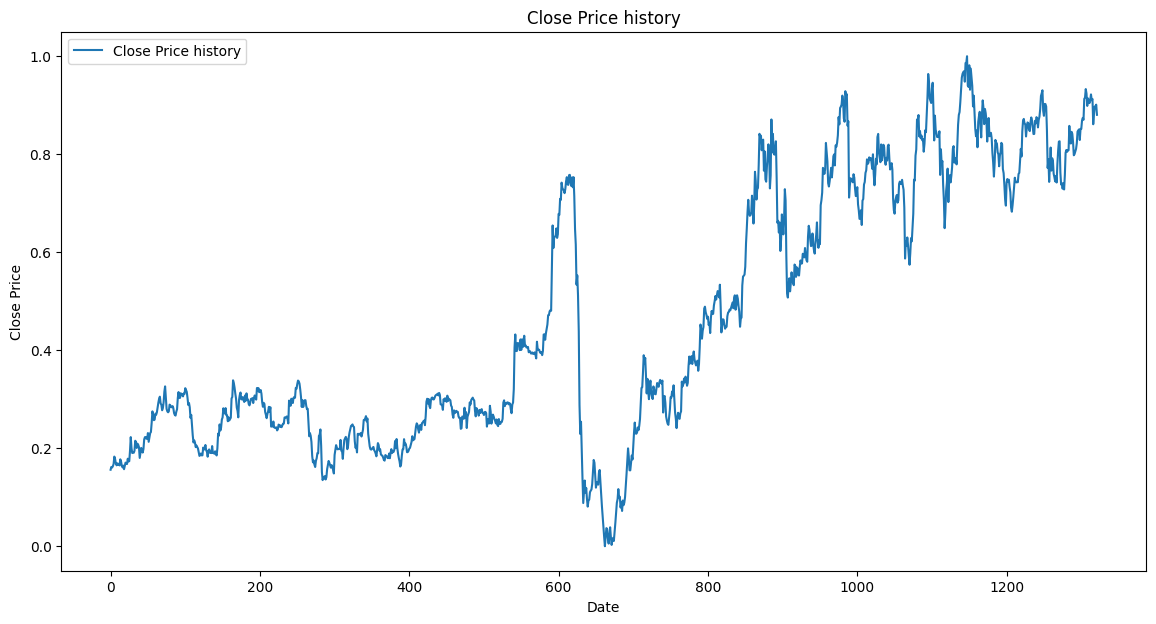

In [8]:
## Given aubank could you visualise the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(aubank_df_final_labelled['Close'], label='Close Price history')
plt.title('Close Price history')
plt.xlabel('Date')

plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()


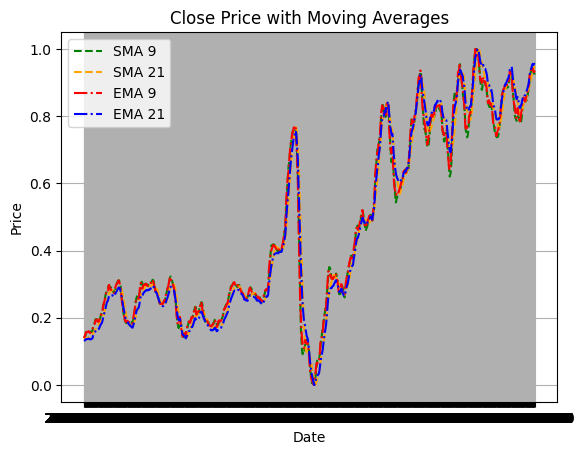

In [9]:
# Plot SMA_9 and SMA_21
plt.plot(aubank_df_final_labelled['Date'], aubank_df_final_labelled['SMA_9'], label='SMA 9', color='green', linestyle='--')
plt.plot(aubank_df_final_labelled['Date'], aubank_df_final_labelled['SMA_21'], label='SMA 21', color='orange', linestyle='--')

plt.plot(aubank_df_final_labelled['Date'], aubank_df_final_labelled['EMA_9'], label='EMA 9', color='red', linestyle='-.')
plt.plot(aubank_df_final_labelled['Date'], aubank_df_final_labelled['EMA_21'], label='EMA 21', color='blue', linestyle='-.')

plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.grid(True)
plt.show()

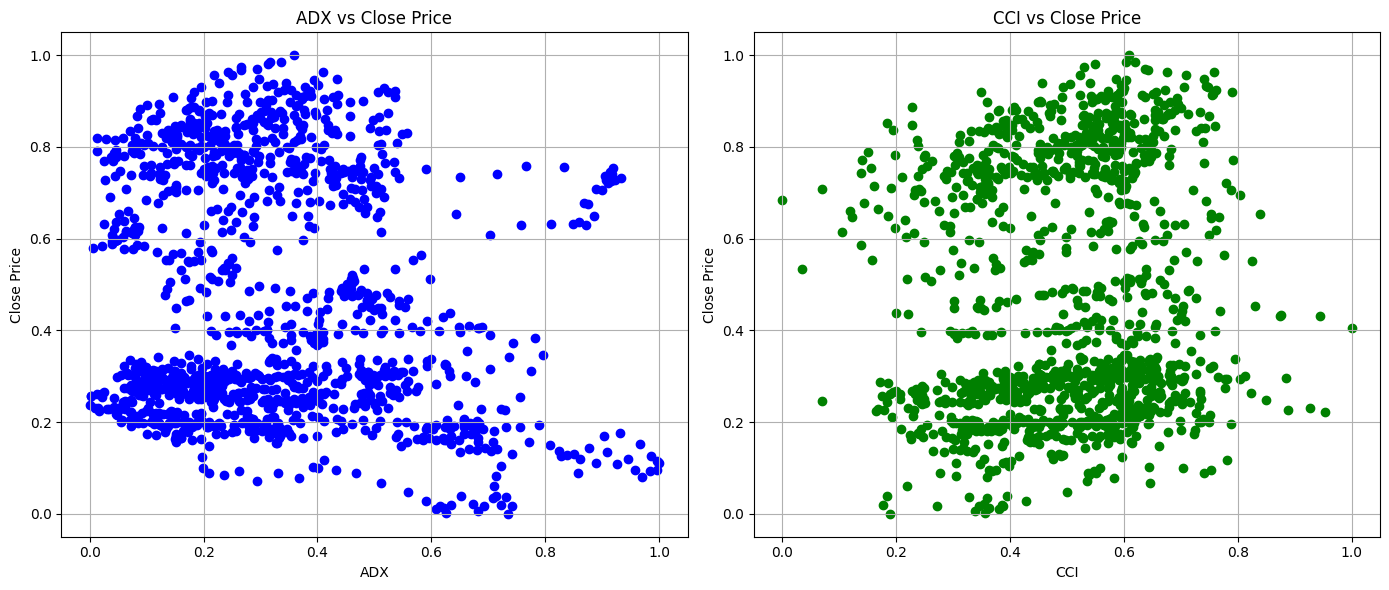

In [126]:
# Scatter Plot for ADX vs. Close Price
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(aubank_df_final_labelled['ADX'], aubank_df_final_labelled['Close'], color='blue', label='ADX vs Close')
plt.xlabel('ADX')
plt.ylabel('Close Price')
plt.title('ADX vs Close Price')
plt.grid(True)

# Scatter Plot for CCI vs. Close Price
plt.subplot(1, 2, 2)
plt.scatter(aubank_df_final_labelled['CCI'], aubank_df_final_labelled['Close'], color='green', label='CCI vs Close')
plt.xlabel('CCI')
plt.ylabel('Close Price')
plt.title('CCI vs Close Price')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

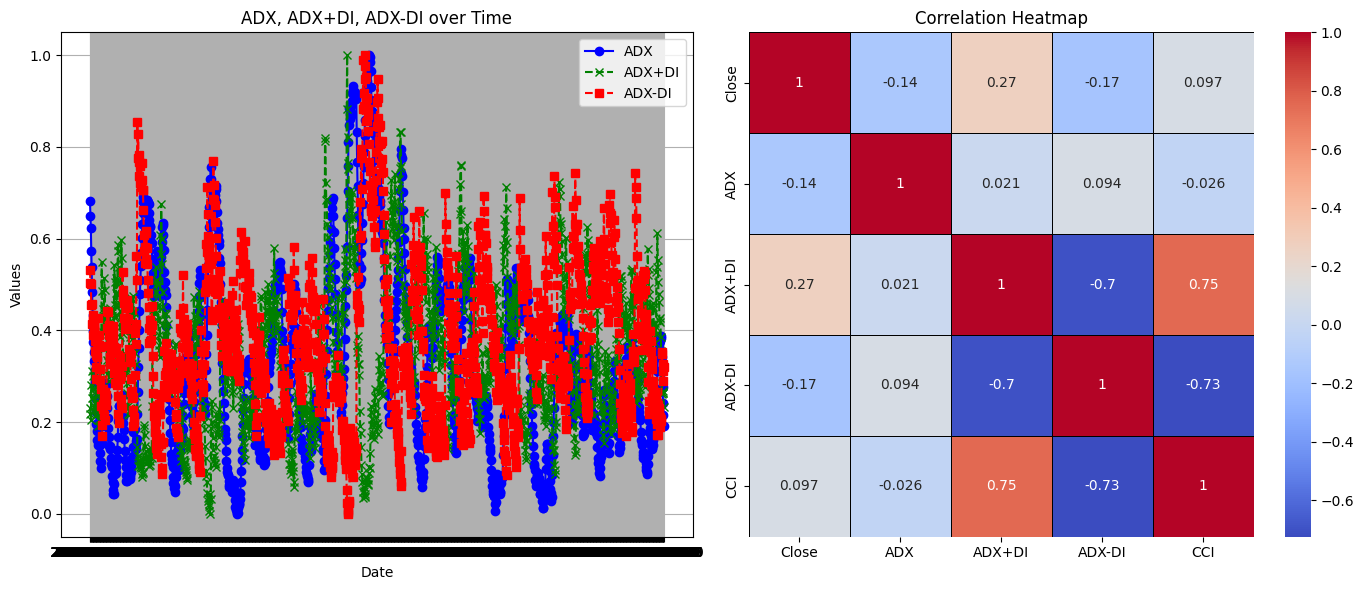

In [127]:
#Plotting ADX, ADX+DI, and ADX-DI over time (as a line chart)
plt.figure(figsize=(14, 6))

# Plotting ADX values
plt.subplot(1, 2, 1)
plt.plot(aubank_df_final_labelled['Date'], aubank_df_final_labelled['ADX'], label='ADX', color='blue', marker='o')
plt.plot(aubank_df_final_labelled['Date'], aubank_df_final_labelled['ADX+DI'], label='ADX+DI', color='green', linestyle='--', marker='x')
plt.plot(aubank_df_final_labelled['Date'], aubank_df_final_labelled['ADX-DI'], label='ADX-DI', color='red', linestyle='--', marker='s')
plt.title('ADX, ADX+DI, ADX-DI over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Correlation heatmap of the dataset
plt.subplot(1, 2, 2)
correlation_matrix = aubank_df_final_labelled[['Close', 'ADX', 'ADX+DI', 'ADX-DI', 'CCI']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')

# Display the plots
plt.tight_layout()
plt.show()

### Prediction

In [11]:
X = aubank_df_final_labelled.drop(['Target', 'Date'], axis=1)
y = aubank_df_final_labelled['Target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Random Forest Classifier

In [13]:
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n" + "-"*40 + "\n")

models = [
    (RandomForestClassifier(n_estimators=100, random_state=42), 'Random Forest'),
    (SVC(kernel='linear', random_state=42), 'Support Vector Machine (SVM)'),
    (DecisionTreeClassifier(random_state=42), 'Decision Tree'),
    (LogisticRegression(random_state=42, max_iter=1000), 'Logistic Regression'),
    (MLPClassifier(random_state=42, max_iter=1000), 'Neural Network (MLPClassifier)')
]

for model, model_name in models:
    evaluate_model(model, model_name)


Model: Random Forest
Accuracy: 0.5019
Precision: 0.5862
Recall: 0.1241
F1-Score: 0.2048
Confusion Matrix:
[[116  12]
 [120  17]]

----------------------------------------

Model: Support Vector Machine (SVM)
Accuracy: 0.5170
Precision: 0.5170
Recall: 1.0000
F1-Score: 0.6816
Confusion Matrix:
[[  0 128]
 [  0 137]]

----------------------------------------

Model: Decision Tree
Accuracy: 0.5057
Precision: 0.5577
Recall: 0.2117
F1-Score: 0.3069
Confusion Matrix:
[[105  23]
 [108  29]]

----------------------------------------

Model: Logistic Regression
Accuracy: 0.5170
Precision: 0.5170
Recall: 1.0000
F1-Score: 0.6816
Confusion Matrix:
[[  0 128]
 [  0 137]]

----------------------------------------

Model: Neural Network (MLPClassifier)
Accuracy: 0.5094
Precision: 0.5133
Recall: 0.9854
F1-Score: 0.6750
Confusion Matrix:
[[  0 128]
 [  2 135]]

----------------------------------------



### Feature Selection

Feature ranking:
1. Feature 5 (0.04804879728957271)
2. Feature 16 (0.04594095623414822)
3. Feature 24 (0.04529666848253232)
4. Feature 21 (0.0447191460910891)
5. Feature 23 (0.04442187062628352)
6. Feature 25 (0.041946228299126656)
7. Feature 20 (0.039933400613733766)
8. Feature 27 (0.039861033187869876)
9. Feature 22 (0.03802694812223939)
10. Feature 14 (0.03736675770560774)
11. Feature 15 (0.037102131213735554)
12. Feature 26 (0.03592402465268823)
13. Feature 13 (0.03516363896382971)
14. Feature 0 (0.0348772900234424)
15. Feature 12 (0.034639040394548216)
16. Feature 19 (0.033269634367913525)
17. Feature 1 (0.032828106612743456)
18. Feature 2 (0.032570131718121766)
19. Feature 3 (0.0317093355244229)
20. Feature 18 (0.031103203021025972)
21. Feature 6 (0.031044574942652503)
22. Feature 4 (0.030754411050283443)
23. Feature 9 (0.030137170037403006)
24. Feature 8 (0.030093690301362507)
25. Feature 11 (0.029466043397352468)
26. Feature 10 (0.028649588720249784)
27. Feature 7 (0.0276500254

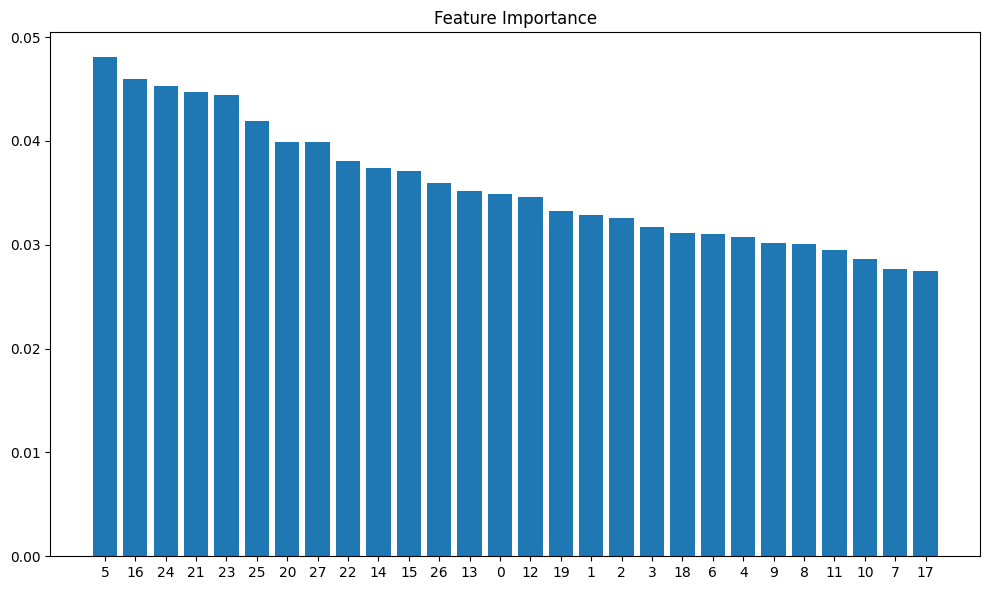

In [14]:
X = aubank_df_final_labelled.drop(['Target'], axis=1).select_dtypes(include=[np.number])
y = aubank_df_final_labelled['Target'].dropna()  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f+1}. Feature {indices[f]} ({importances[indices[f]]})")


plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.tight_layout()
plt.show()


Select Top 5 Features

In [15]:
n = 5
important_features = indices[:n]

X_reduced = X.iloc[:, important_features]

X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, shuffle=False)

In [16]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_reduced, y_train)


y_pred = log_reg.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.5170
Precision: 0.5170
Recall: 1.0000
F1-Score: 0.6816


### Utilizing Time Series Relations

In [17]:
X = aubank_df_final_labelled.drop(['Target', 'Date'], axis=1).select_dtypes(include=[np.number])
y = aubank_df_final_labelled['Target'].dropna()  


In [18]:
def create_lagged_features(X, y, lag=20):
    X_lagged = []
    y_lagged = []
    for i in range(lag, len(X)):
        X_lagged.append(X[i-lag:i]) 
        y_lagged.append(y.iloc[i])
    return np.array(X_lagged), np.array(y_lagged)


X_lagged, y_lagged = create_lagged_features(X, y)


X_lagged = np.array(X_lagged).astype(np.float32)
y_lagged = np.array(y_lagged).astype(np.float32)


X_train, X_test, y_train, y_test = train_test_split(X_lagged, y_lagged, test_size=0.2, shuffle=False)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

y_pred = (model.predict(X_test) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


C:\Users\shubham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
33/33 - 8s - 246ms/step - accuracy: 0.5062 - loss: 0.6951 - val_accuracy: 0.4828 - val_loss: 0.6970
Epoch 2/50
33/33 - 1s - 23ms/step - accuracy: 0.4918 - loss: 0.6965 - val_accuracy: 0.4828 - val_loss: 0.6939
Epoch 3/50
33/33 - 1s - 24ms/step - accuracy: 0.5197 - loss: 0.6942 - val_accuracy: 0.5172 - val_loss: 0.6947
Epoch 4/50
33/33 - 1s - 23ms/step - accuracy: 0.5187 - loss: 0.6939 - val_accuracy: 0.5172 - val_loss: 0.6932
Epoch 5/50
33/33 - 1s - 23ms/step - accuracy: 0.5062 - loss: 0.6941 - val_accuracy: 0.5172 - val_loss: 0.6950
Epoch 6/50
33/33 - 1s - 24ms/step - accuracy: 0.5197 - loss: 0.6921 - val_accuracy: 0.5096 - val_loss: 0.6929
Epoch 7/50
33/33 - 1s - 27ms/step - accuracy: 0.5168 - loss: 0.6924 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 8/50
33/33 - 1s - 24ms/step - accuracy: 0.5159 - loss: 0.6932 - val_accuracy: 0.5172 - val_loss: 0.6944
Epoch 9/50
33/33 - 1s - 23ms/step - accuracy: 0.5168 - loss: 0.6931 - val_accuracy: 0.5172 - val_loss: 0.6934
Epoch 10/

In [24]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.1/124.9 MB 469.7 kB/s eta 0:04:26
   ---------------------------------------- 0.1/124.9 MB 525.1 kB/s eta 0:03:58
   ---------------------------------------- 0.1/124.9 MB 504.4 kB/s eta 0:04:08
   ---------------------------------------- 0.1/124.9 MB 532.5 kB/s eta 0:03:55
   -------------------------------------

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier
xgb_model = XGBClassifier(random_state=42)

# Reshape the data to 2D
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Fit the model
xgb_model.fit(X_train_2d, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_2d)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBClassifier Model")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print("Confusion Matrix:")
print(conf_matrix_xgb)



XGBClassifier Model
Accuracy: 0.4828
Precision: 0.5000
Recall: 0.5778
F1-Score: 0.5361
Confusion Matrix:
[[48 78]
 [57 78]]
